## 分类拟合

In [1]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[-2,2], [2,2], [0,4]]
X,y = make_blobs(n_samples=60, centers=centers, random_state=0, cluster_std=0.60)

In [2]:
import numpy as np
import matplotlib.pyplot as plt

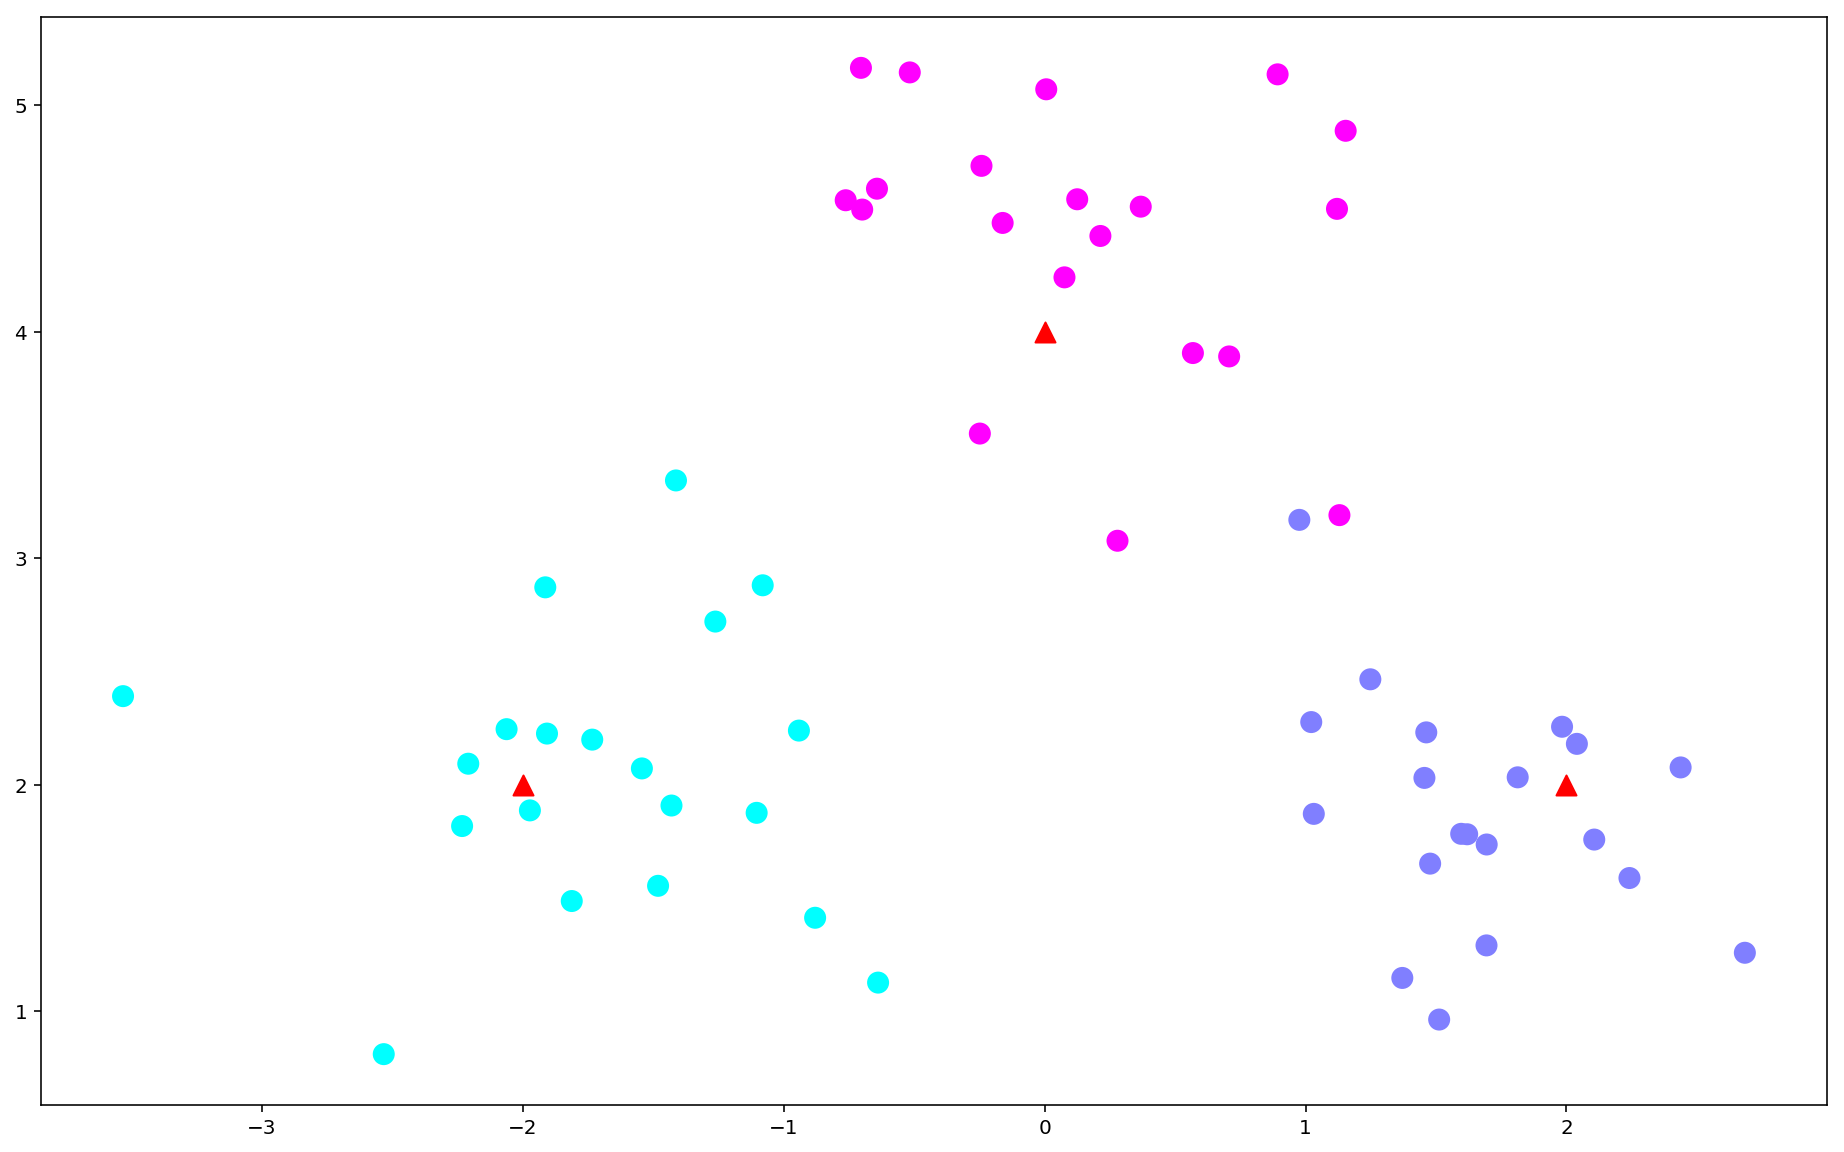

In [7]:
plt.figure(figsize=(16,10),dpi=144)
c=np.array(centers)
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='cool');
plt.scatter(c[:,0], c[:,1], s=100, marker='^',c='r')

In [8]:
from sklearn.neighbors import KNeighborsClassifier

# 模型训练
k = 5
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [21]:
# 进行预测
X_sample = [[0,2]]
y_sample = clf.predict(X_sample)
neighbors = clf.kneighbors(X_sample, return_distance=False)

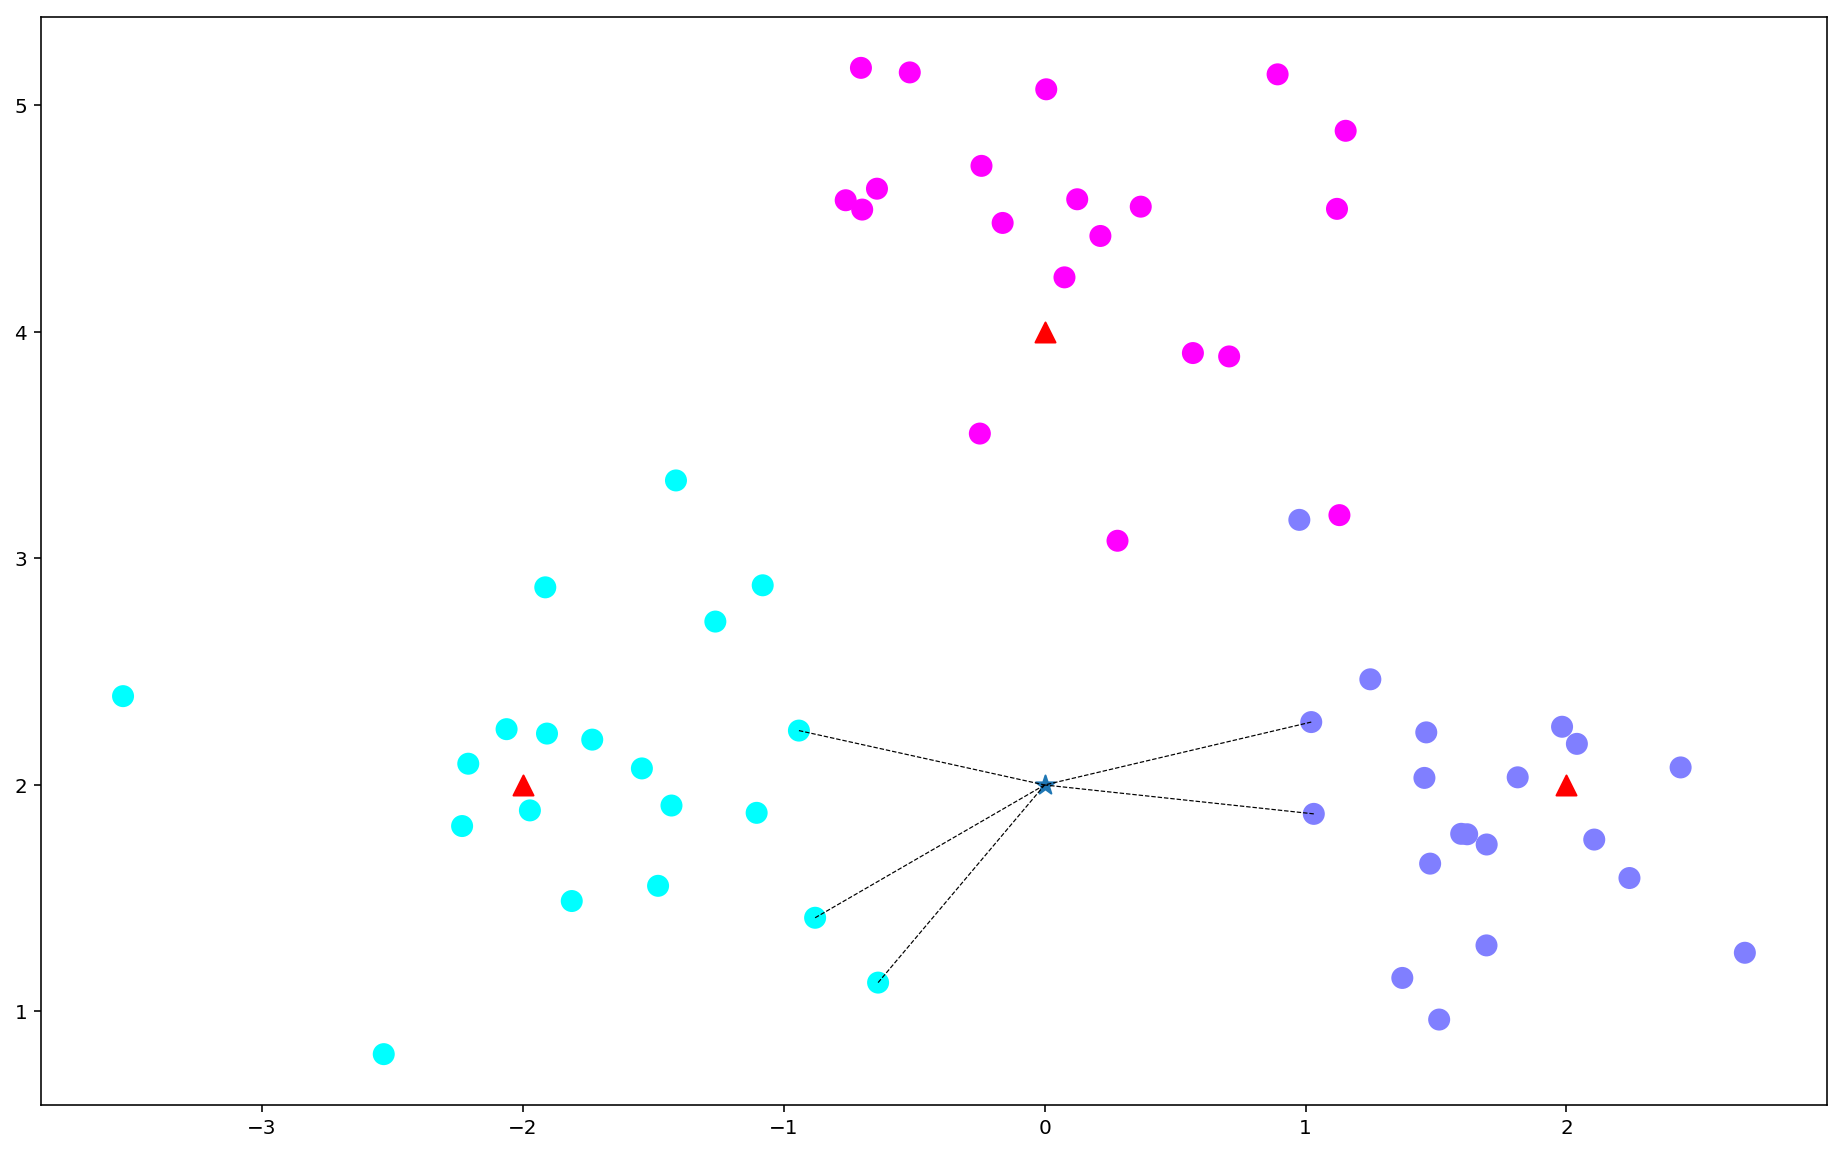

In [43]:
# 画出示意图
plt.figure(figsize=(16,10),dpi=144)
plt.scatter(X[:,0], X[:,1], c=y, s=100, cmap='cool');
plt.scatter(c[:,0], c[:,1], s=100, marker='^',c='r')
plt.scatter(X_sample[0][0], X_sample[0][1], marker='*',  s=100, cmap='cool')

for i in neighbors[0]:
    plt.plot([X[i][0], X_sample[0][0]], [X[i][1], X_sample[0][1]], 'k--', linewidth=0.6)
    

## 回归拟合

In [61]:
import numpy as np
n_dots = 40
X = 5*np.random.randn(n_dots, 1)
y = np.cos(X).ravel()

y += 0.2*np.random.rand(n_dots) - 0.1

In [62]:
from sklearn.neighbors import KNeighborsRegressor
# 训练模型
k = 5
knn = KNeighborsRegressor(k)
knn.fit(X,y);

In [63]:
# 生成预测点
T = np.linspace(0, 5, 500)[:, np.newaxis]
y_pred = knn.predict(T)
knn.score(X, y)

0.6754185843419678

Text(0.5,1,'KNeighborsRegressor (k=5)')

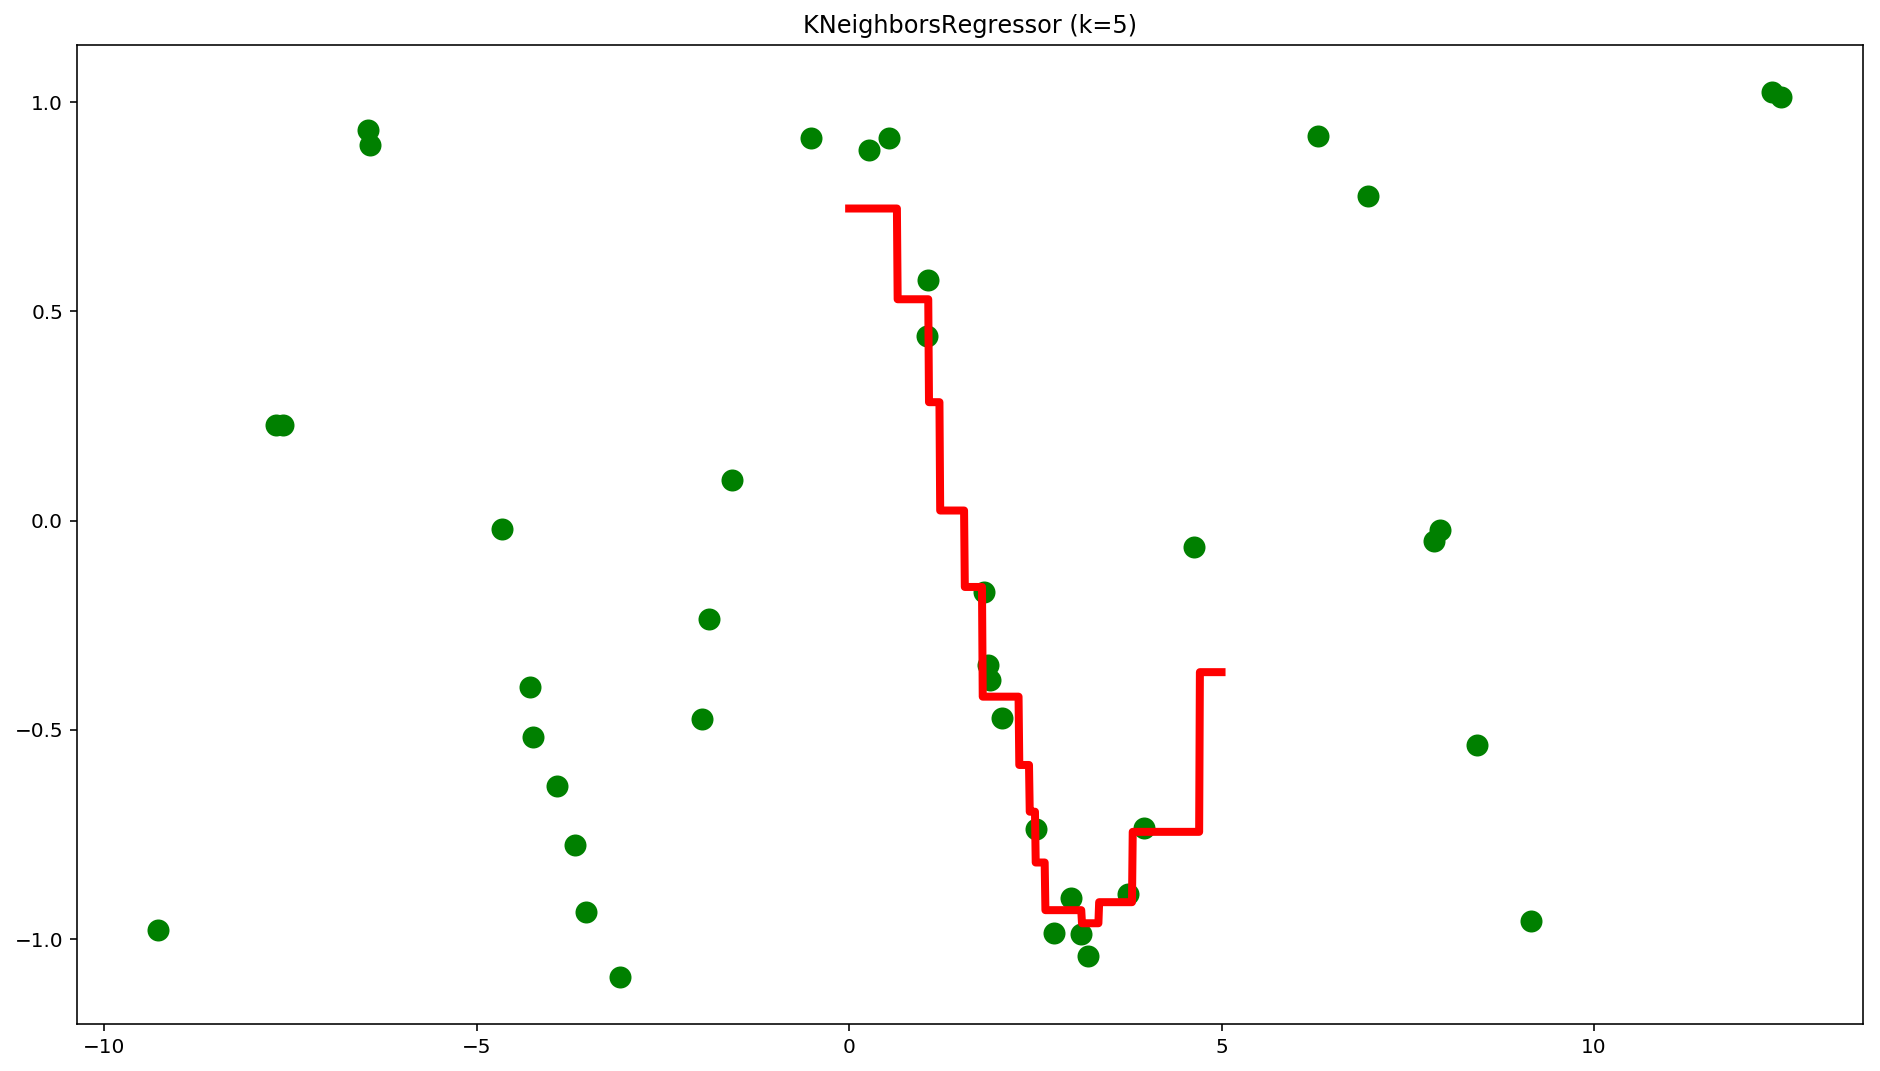

In [64]:
plt.figure(figsize=(16,9), dpi=144)
plt.scatter(X,y, c='g', s=100, label='data')
plt.plot(T, y_pred, c='r', lw=4, label='prediction')
plt.axis('tight')
plt.title('KNeighborsRegressor (k=%i)' % k)


## 糖尿病预测

In [1]:
import pandas as pd

In [2]:
#  加载数据
data = pd.read_csv('../data/diabetes.csv')

In [3]:
data.shape

(442, 11)

In [4]:
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,value
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [6]:
data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,value
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634599e-16,1.296411e-16,-8.042209e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.575274e-16,3.780755e-16,-3.830854e-16,-3.411950e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000
